# Math599 2023S

$\newcommand{\trans}{^\top}
\newcommand{\adj}{^{\rm adj}}
\newcommand{\cof}{^{\rm cof}}
\newcommand{\inp}[2]{\left\langle#1,#2\right\rangle}
\newcommand{\dunion}{\mathbin{\dot\cup}}
\newcommand{\bzero}{\mathbf{0}}
\newcommand{\bone}{\mathbf{1}}
\newcommand{\ba}{\mathbf{a}}
\newcommand{\bb}{\mathbf{b}}
\newcommand{\bc}{\mathbf{c}}
\newcommand{\bd}{\mathbf{d}}
\newcommand{\be}{\mathbf{e}}
\newcommand{\bh}{\mathbf{h}}
\newcommand{\bp}{\mathbf{p}}
\newcommand{\bq}{\mathbf{q}}
\newcommand{\br}{\mathbf{r}}
\newcommand{\bx}{\mathbf{x}}
\newcommand{\by}{\mathbf{y}}
\newcommand{\bz}{\mathbf{z}}
\newcommand{\bu}{\mathbf{u}}
\newcommand{\bv}{\mathbf{v}}
\newcommand{\bw}{\mathbf{w}}
\newcommand{\tr}{\operatorname{tr}}
\newcommand{\nul}{\operatorname{null}}
\newcommand{\rank}{\operatorname{rank}}
%\newcommand{\ker}{\operatorname{ker}}
\newcommand{\range}{\operatorname{range}}
\newcommand{\Col}{\operatorname{Col}}
\newcommand{\Row}{\operatorname{Row}}
\newcommand{\spec}{\operatorname{spec}}
\newcommand{\vspan}{\operatorname{span}}
\newcommand{\Vol}{\operatorname{Vol}}
\newcommand{\sgn}{\operatorname{sgn}}
\newcommand{\idmap}{\operatorname{id}}
\newcommand{\am}{\operatorname{am}}
\newcommand{\gm}{\operatorname{gm}}
\newcommand{\mult}{\operatorname{mult}}
\newcommand{\iner}{\operatorname{iner}}$

$\newcommand{\january}{\text{principal component analysis}}
\newcommand{\february}{\text{multidimensional scaling}}
\newcommand{\march}{k\text{-means clustering}}
\newcommand{\april}{\text{DBSCAN}}
\newcommand{\may}{\text{linear regression}}
\newcommand{\june}{\text{polynomial regression}}
\newcommand{\july}{k\text{-nearest neighbors classification}}
\newcommand{\august}{\text{decision tree classification}}
\newcommand{\mother}[5]{#1\cdot#5}
\newcommand{\energy}{\sum_{i=0}^{N-1}(y_i - c_0 - c_1x_i)^2}
\newcommand{\potential}{\sum_{i=0}^{N-1}(y_i - c_0x_i - c_1e^{x_i})^2}
\newcommand{\derivative}{\text{principal component}}
\newcommand{\innerproduct}{\text{explained variance}}
\newcommand{\singularities}{\text{centers}}
\newcommand{\eigenvalues}{\text{cores}}$

## ML exam

Please find the `ipynb` and related files for this exam through the link below.  
https://hackmd.io/@jephianlin/rJezEteyUh

Name:  

Student ID #:  

Please read the instructions carefully:

1. Write your **name** and **Student ID #** first.  
2. Write down your answers **on the exam paper**; no need to write down the code.    
3. You are allowed to use the internet, but you are **NOT allowed to communicate** with others in any form.
4. **Do NOT use your cell phone**, use the computer instead.
5. Different problems might use same variable names.  Make sure you use the right one to answer the problem.
6. If the answer is too long, write **two digits after the decimal point**.

---

**Load the packages**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision=3, suppress=True)

**Download the dataset**

Please do not modify the files.

In [2]:
import os
import urllib
import numpy as np

base = r"https://github.com/SageLabTW/auto-grading/raw/master/nsysu-digits/"
for c in ['X', 'y']:
    filename = "nsysu-digits-%s.csv"%c
    if filename not in os.listdir('.'):
        print(filename, 'not found --- will download')
        urllib.request.urlretrieve(base + c + ".csv", filename)

###### Problem 1 [2pt]

Let  

```python
A = np.array([[1,1,-1,-1],
              [1,1,-2,-2],
              [2,2,-1,-1]])
grid = np.meshgrid(np.arange(3), 
                   np.arange(3), 
                   np.arange(3))
xx = grid[0].ravel()
yy = grid[1].ravel()
zz = grid[2].ravel()
C = np.vstack([xx, yy, zz]).T
```

Apply $\january$ to $X = \mother{C}{1}{2}{3}{A}$ and find its first $\derivative$ (index `0` ).

_Your answer:_

In [3]:
A = np.array([[1,1,-1,-1],
              [1,1,-2,-2],
              [2,2,-1,-1]])
grid = np.meshgrid(np.arange(3), 
                   np.arange(3), 
                   np.arange(3))
xx = grid[0].ravel()
yy = grid[1].ravel()
zz = grid[2].ravel()
C = np.vstack([xx, yy, zz]).T
X = C.dot(A)

from sklearn.decomposition import PCA
model = PCA(1)
X_new = model.fit_transform(X)
model.components_

array([[-0.5, -0.5,  0.5,  0.5]])

###### Problem 2 [2pt]

Let  

```python
A = np.array([[1,1,-1,-1],
              [1,1,-2,-2],
              [2,2,-1,-1]])
grid = np.meshgrid(np.arange(3), 
                   np.arange(3), 
                   np.arange(3))
xx = grid[0].ravel()
yy = grid[1].ravel()
zz = grid[2].ravel()
C = np.vstack([xx, yy, zz]).T
```

Apply the $\january$ to $X = \mother{C}{1}{2}{3}{A}$.  Then use the $\innerproduct$ to determine the dimension of the data.

_Your answer:_

2 dimension is enough to get almost 100% explained variance.


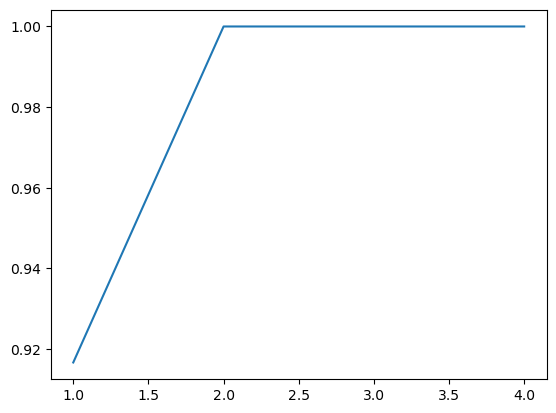

In [4]:
A = np.array([[1,1,-1,-1],
              [1,1,-2,-2],
              [2,2,-1,-1]])
grid = np.meshgrid(np.arange(3), 
                   np.arange(3), 
                   np.arange(3))
xx = grid[0].ravel()
yy = grid[1].ravel()
zz = grid[2].ravel()
C = np.vstack([xx, yy, zz]).T
X = C.dot(A)

from sklearn.decomposition import PCA
model = PCA(4)
X_new = model.fit_transform(X)
plt.plot(np.arange(1,5), model.explained_variance_ratio_.cumsum())
print("2 dimension is enough to get almost 100% explained variance.")

###### Problem 3 [2pt]

Suppose at some step of the $\march$, we get three $\singularities$  

$$
    \begin{aligned}
    \mu_0 &= (1,1,-1,-1), \\
    \mu_1 &= (1,1,-2,-2), \\
    \mu_2 &= (2,2,-1,-1).
    \end{aligned}
$$

Following the $\march$, how should we label the point $\bp = (2,2,2,1)$?  

_Your answer:_

In [5]:
mus = np.array([[1,1,-1,-1],
                [1,1,-2,-2],
                [2,2,-1,-1]])
p = np.array([2,2,2,1])

dist = np.linalg.norm(mus - p, axis=1)
dist.argmin()

2

###### Problem 4 [2pt]

Let  

```python
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
X = Xsys[ysys==1]
```

Apply $\april$ to `X` and find out the number of $\eigenvalues$.

_Your answer:_

In [6]:
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
X = Xsys[ysys==1]

from sklearn.cluster import DBSCAN
model = DBSCAN(eps=1100, min_samples=5)
model.fit(X)

# The problem did not provide you with 
# the hyperparameters eps and min_samples,
# so any answer is correct.  
# Everyone will receive 2 points for this problem.
model.core_sample_indices_.shape

(109,)

###### Problem 5 [2pt]

Let  

```python
x = np.arange(1,11)
y = 0.3 * x + 5 + 0.5*np.sin(x)
```

Let $x_0, \ldots, x_{N-1}$ and $y_0, \ldots, y_{N-1}$ be the entries of `x` and `y` , respectively.  Find $c_0$ and $c_1$ such that $\energy$ is minimized.

_Your answer:_

c0 = 5.1836863219109155
c1 = 0.2794314721181791


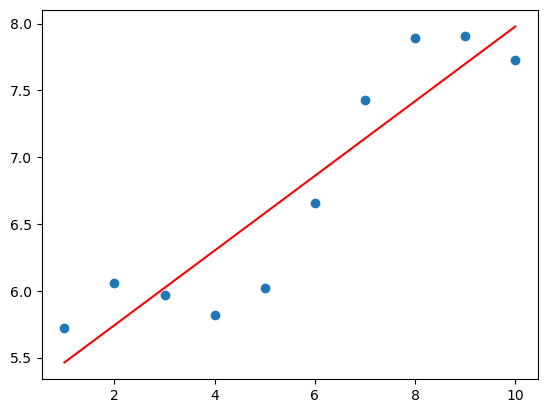

In [7]:
x = np.arange(1,11)
y = 0.3 * x + 5 + 0.5*np.sin(x)
X = x[:,np.newaxis]

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
y_new = model.predict(X)
plt.plot(x, y_new, c='red')
plt.scatter(x, y)

print('c0 =', model.intercept_)
print('c1 =', *model.coef_)

###### Problem 6 [2pt]

Let  

```python
x = np.linspace(-1.5,-0.5,10)
y = np.sin(x)
```

Let $x_0, \ldots, x_{N-1}$ and $y_0, \ldots, y_{N-1}$ be the entries of `x` and `y` , respectively.  Find $c_0$ and $c_1$ such that $\potential$ is minimized.

_Your answer:_

c0, c1 = [ 0.665 -0.346]


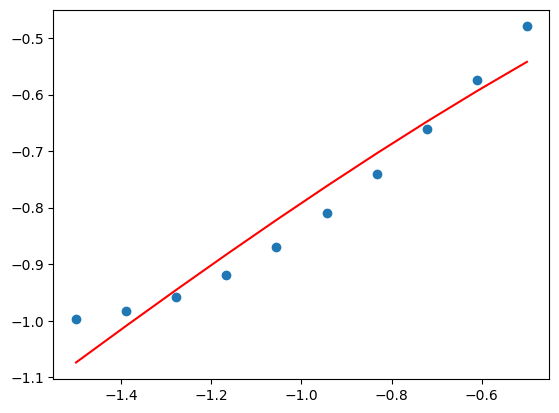

In [8]:
x = np.linspace(-1.5,-0.5,10)
y = np.sin(x)
X = np.vstack([x, np.exp(x)]).T

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
y_new = model.predict(X)
plt.plot(x, y_new, c='red')
plt.scatter(x, y)

print('c0, c1 =', model.coef_)

###### Problem 7 [2pt]

Let  

```python
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
mask = (ysys==4) | (ysys==5)
X = Xsys[mask]
y = ysys[mask]
```

Apply $\july$ to `X` and `y` with `n_neighbors=5` .  Read the image  
https://github.com/SageLabTW/auto-grading/blob/master/sampleJ/sampleJ_000.png  
by downloading it and   

```python
from PIL import Image
img = Image.open('sampleJ_000.png')
img = np.array(img)
```

What is the prediction of it according to your model?

_Your answer:_

In [9]:
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
mask = (ysys==4) | (ysys==5)
X = Xsys[mask]
y = ysys[mask]

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(5)
model.fit(X, y)

from PIL import Image
img = Image.open('sampleJ_000.png')
img = np.array(img)

X_new = img.reshape(1,784)
y_new = model.predict(X_new)
y_new

/home/jephian/.local/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([5])

###### Problem 8 [2pt]

Let  

```python
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
mask = (ysys==4) | (ysys==5)
X = Xsys[mask]
y = ysys[mask]
```

Read the image  
https://github.com/SageLabTW/auto-grading/blob/master/sampleJ/sampleJ_000.png  
by downloading it and   

```python
from PIL import Image
img = Image.open('sampleJ_000.png')
img = np.array(img)
```

What are the votes from its $5$ nearest neighbors?

_Your answer:_

In [10]:
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
mask = (ysys==4) | (ysys==5)
X = Xsys[mask]
y = ysys[mask]

from PIL import Image
img = Image.open('sampleJ_000.png')
img = np.array(img)

X_new = img.reshape(1,784)
dist = np.linalg.norm(X - X_new, axis=1)
nbrs = np.argpartition(dist, 4)[:5]
votes = y[nbrs]
print(votes)

[4 5 4 5 5]


###### Problem 9 [2pt]

Consider the tree

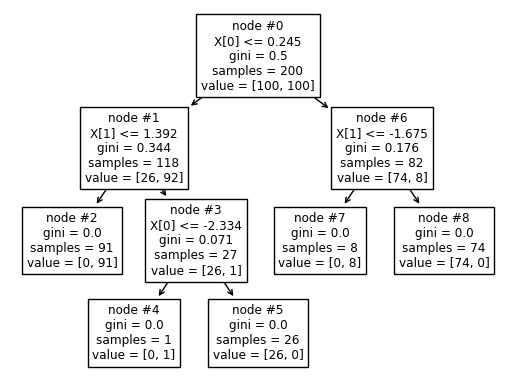

Which node does the data point $\bp = (-3,2)$ belong to?  
(Left means True, while Right means False.)

_Your answer:_

In [11]:
print("Node #4")

Node #4


###### Problem 10 [2pt]

Base on the information  

```python
tree.children_left  = [1, 3, 5, -1, -1, 7, -1, -1, -1]
tree.children_right = [2, 4, 6, -1, -1, 8, -1, -1, -1]
```

draw the tree.

_Your answer:_

         0
        / \
      1     2
     / \   / \
    3   4 5   6
         / \
        7   8

###### Problem 11 [extra 2pt]

Let  

```python
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
X = Xsys[:1300]
y = ysys[:1300]
X_test = Xsys[1300:]
y_test = ysys[1300:]
```

The dataset `Xsys` contains 1639 flattened images.  Train a model (of your choice) with `X` anad `y` .  Then test your model with `X_test` and `y_test` .  How good is the accuracy you can get?  

Write a few sentences describing how you train your model and tell me its accuracy.  (open answer)

Please keep your code somewhere.  If your model has a very good performance, I would love to learn more about your work.

_Your answer:_

Any classification model is okay

In [12]:
Xsys = np.genfromtxt('nsysu-digits-X.csv', dtype=int, delimiter=',') ### flattened already
ysys = np.genfromtxt('nsysu-digits-y.csv', dtype=int, delimiter=',')
X = Xsys[:1300]
y = ysys[:1300]
X_test = Xsys[1300:]
y_test = ysys[1300:]

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X, y)
y_model = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.36578171091445427

---  
Exam ends here.  
Total point = 20 (+2)

Your score: